In [1]:
#Import Libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
from sklearn.model_selection import cross_val_predict
from sklearn import metrics
from sklearn import svm
%matplotlib inline


In [2]:
#dataframe shape
df = pd.read_csv('Bruno.csv')
df.shape

(58, 17)

In [3]:

pd.set_option('display.max_rows', None)

In [4]:

df.reset_index(inplace=True)
df.head(3)

,index,Unnamed: 0,album,track_number,id,name,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,artist
0,0,17,Red Pill Blues + (Deluxe),18,0EBEgnRLPTEAmofirXu4hQ,Wake Up Call - Mark Ronson Remix,spotify:track:0EBEgnRLPTEAmofirXu4hQ,0.09360,0.621,0.903,0.000000,0.0786,-3.499,0.1120,89.237,0.921,2,maroon 5
1,1,18,Red Pill Blues + (Deluxe),19,5uZr1d2CPHznf39x0c2Zc1,If I Never See Your Face Again,spotify:track:5uZr1d2CPHznf39x0c2Zc1,0.00334,0.768,0.795,0.000001,0.1100,-3.047,0.0366,106.005,0.922,1,maroon 5
2,2,19,Red Pill Blues + (Deluxe),20,5Ku5Qg4TJxlfxu1gDaKll8,Moves Like Jagger - Studio Recording From The ...,spotify:track:5Ku5Qg4TJxlfxu1gDaKll8,0.01170,0.719,0.764,0.000000,0.3070,-4.514,0.0445,128.042,0.609,1,maroon 5


In [5]:
#Drop index column
#df = df.drop('index', axis= 1)

features_df = df.drop(columns=['index', 'Unnamed: 0','album','track_number','id','name','uri','tempo','popularity','artist','loudness'])
features_df

,acousticness,danceability,energy,instrumentalness,liveness,speechiness,valence
0,0.093600,0.621,0.903,0.000000,0.0786,0.1120,0.9210
1,0.003340,0.768,0.795,0.000001,0.1100,0.0366,0.9220
2,0.011700,0.719,0.764,0.000000,0.3070,0.0445,0.6090
3,0.087100,0.812,0.545,0.000301,0.0834,0.0622,0.3060
4,0.221000,0.757,0.701,0.000014,0.1030,0.0741,0.6350
5,0.049600,0.588,0.883,0.000000,0.4290,0.0518,0.4370
6,0.084300,0.503,0.744,0.000000,0.7230,0.0374,0.1260
7,0.113000,0.507,0.958,0.000000,0.9840,0.0960,0.6540
8,0.127000,0.526,0.608,0.000000,0.1130,0.1690,0.3720
9,0.078800,0.799,0.597,0.000006,0.1000,0.0611,0.4190


No handles with labels found to put in legend.


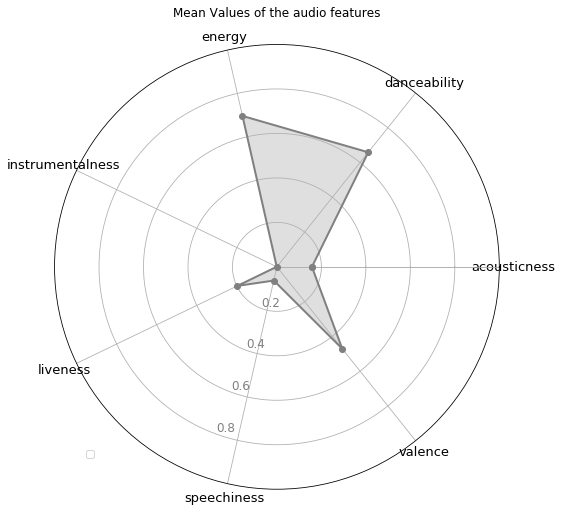

In [6]:

labels= list(features_df)[:]
stats= features_df.mean().tolist()


angles=np.linspace(0, 2*np.pi, len(labels), endpoint=False)

# close the plot
stats=np.concatenate((stats,[stats[0]]))
angles=np.concatenate((angles,[angles[0]]))

#Size of the figure
fig=plt.figure(figsize = (18,18))

ax = fig.add_subplot(221, polar=True)
ax.plot(angles, stats, 'o-', linewidth=2, color= 'gray')
ax.fill(angles, stats, alpha=0.25, facecolor='gray')
ax.set_thetagrids(angles * 180/np.pi, labels , fontsize = 13)


ax.set_rlabel_position(250)
plt.yticks([0.2 , 0.4 , 0.6 , 0.8  ], ["0.2",'0.4', "0.6", "0.8"], color="grey", size=12)
plt.ylim(0,1)

ax.set_title('Mean Values of the audio features')
ax.grid(True)

plt.legend(loc='best', bbox_to_anchor=(0.1, 0.1))


